# 🥷🏼 Using Dataset Ninja Datasets
This is a tutorial about converting a dataset in the format we accept in the platform.

## Semantic Segmentation

As an example, we will use the [PASCAL VOC 2012](https://host.robots.ox.ac.uk/pascal/VOC/) dataset for semantic segmentation that you can download at [Dataset Ninja platform](https://datasetninja.com/pascal-voc-2012#download).

In [20]:
dataset_dir = "../datasets"
dataset_name = 'pascal'
new_name = 'pascal_mask'

use_background=True
ignore_classes=["neutral"]
ignore_folders=[]
train_split_name = 'train'
val_split_name = 'val'
image_folder = 'img'
mask_folder = 'ann'


In [ ]:
from focoos.data.converters import convert_datasetninja_to_mask_dataset

convert_datasetninja_to_mask_dataset(dataset_root=dataset_dir, dataset_name=dataset_name, new_name=new_name, image_folder=image_folder, mask_folder=mask_folder, ignore_folders=ignore_folders, use_background=use_background, ignore_classes=ignore_classes, train_split_name=train_split_name, val_split_name=val_split_name)

Let's see if everything is ok! 
We can try to load it with `AutoDataset` and then see some previews.

In [21]:
from focoos.data.auto_dataset import AutoDataset
from focoos.data.default_aug import DatasetAugmentations
from focoos.ports import DatasetLayout, DatasetSplitType, Task

task = Task.SEMSEG
layout = DatasetLayout.ROBOFLOW_SEG 
auto_dataset = AutoDataset(dataset_name=new_name, task=task, layout=layout, datasets_dir=dataset_dir)

augs = DatasetAugmentations(resolution=512)

train_dataset = auto_dataset.get_split(augs=augs.get_augmentations(), split=DatasetSplitType.TRAIN)
valid_dataset = auto_dataset.get_split(augs=augs.get_augmentations(), split=DatasetSplitType.VAL)


[05/30 13:56][INFO][focoos.data.auto_dataset]: ✅ Dataset name: pascal_mask, Dataset Path: ../datasets/pascal_mask, Dataset Layout: DatasetLayout.ROBOFLOW_SEG
[05/30 13:56][INFO][focoos.data.datasets.dict_dataset]: [Focoos-DictDataset] dataset pascal_mask loaded. len: 1464, classes:21 ,../datasets/pascal_mask/train
[05/30 13:56][DEBUG][focoos.data.datasets.serialize]: Serializing 1464 elements to byte tensors and concatenating them all ...
[05/30 13:56][DEBUG][focoos.data.datasets.serialize]: Serialized dataset takes 0.38 MiB
[05/30 13:56][INFO][focoos.data.mappers.semantic_dataset_mapper]: [SemanticDatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=[512, 512], max_size=4096, sample_style=range, interp=2)]
[05/30 13:56][INFO][focoos.data.datasets.dict_dataset]: [Focoos-DictDataset] dataset pascal_mask loaded. len: 1449, classes:21 ,../datasets/pascal_mask/val
[05/30 13:56][DEBUG][focoos.data.datasets.serialize]: Serializing 1449 elements to byte tensors

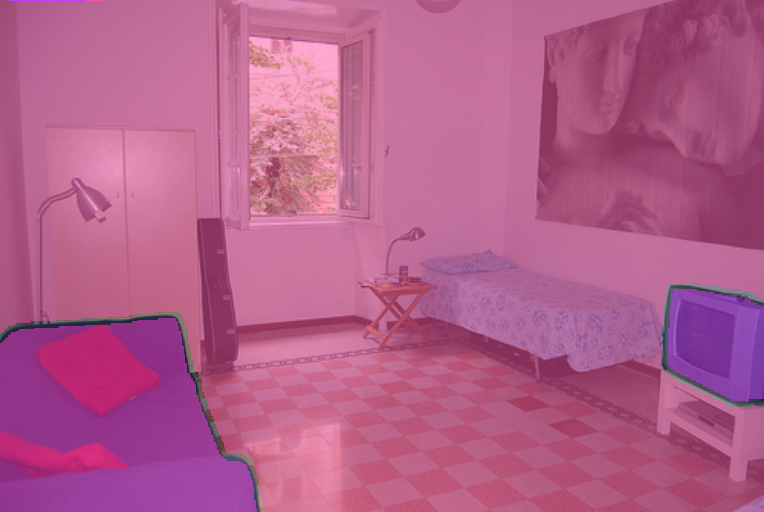

In [22]:
train_dataset.preview()

Then, if you want to upload the dataset on the Focoos platform, go on the folder of the dataset and zip it.

In [ ]:
%cd {dataset_dir}/{new_name}
!zip -r {new_name}.zip .
!mv {new_name}.zip ../
%cd ..

## Object Detection

As an example, we will use a vehicle dataset for object detection that you can download at [Dataset Ninja platform](https://datasetninja.com/vehicle-dataset-for-yolo#download).

In [18]:
dataset_dir = "../datasets"
dataset_name = 'vehicle'
new_name = 'vehicle_coco'

ignore_classes=[]
ignore_folders=[]
train_split_name = 'train'
val_split_name = 'valid'
image_folder = 'img'
mask_folder = 'ann'
remove_json = False

Let's convert it

In [ ]:
from focoos.data.converters import convert_supervisely_dataset_to_coco

convert_supervisely_dataset_to_coco(dataset_dir, dataset_name=dataset_name, new_name=new_name, image_folder=image_folder, mask_folder=mask_folder, ignore_classes=ignore_classes, train_split_name=train_split_name, val_split_name=val_split_name, remove_json=remove_json)

Let's load the dataset and check that everything is fine!

In [ ]:
from focoos.data.auto_dataset import AutoDataset
from focoos.data.default_aug import DatasetAugmentations
from focoos.ports import DatasetLayout, DatasetSplitType, Task

task = Task.DETECTION
layout = DatasetLayout.ROBOFLOW_COCO
auto_dataset = AutoDataset(dataset_name=new_name, task=task, layout=layout, datasets_dir=dataset_dir)

augs = DatasetAugmentations(resolution=512)

train_dataset = auto_dataset.get_split(augs=augs.get_augmentations(), split=DatasetSplitType.TRAIN)
valid_dataset = auto_dataset.get_split(augs=augs.get_augmentations(), split=DatasetSplitType.VAL)


In [ ]:
valid_dataset.preview()

Then, if you want to upload the dataset on the Focoos platform, go on the folder of the dataset and zip it.

In [ ]:
%cd {dataset_dir}/{new_name}
!zip -r {new_name}.zip .
!mv {new_name}.zip ../
%cd ..